# Exercise 01 : Line chart with styles

The dataframe for the graph contains, rows: 32
Times views > 150 = 2


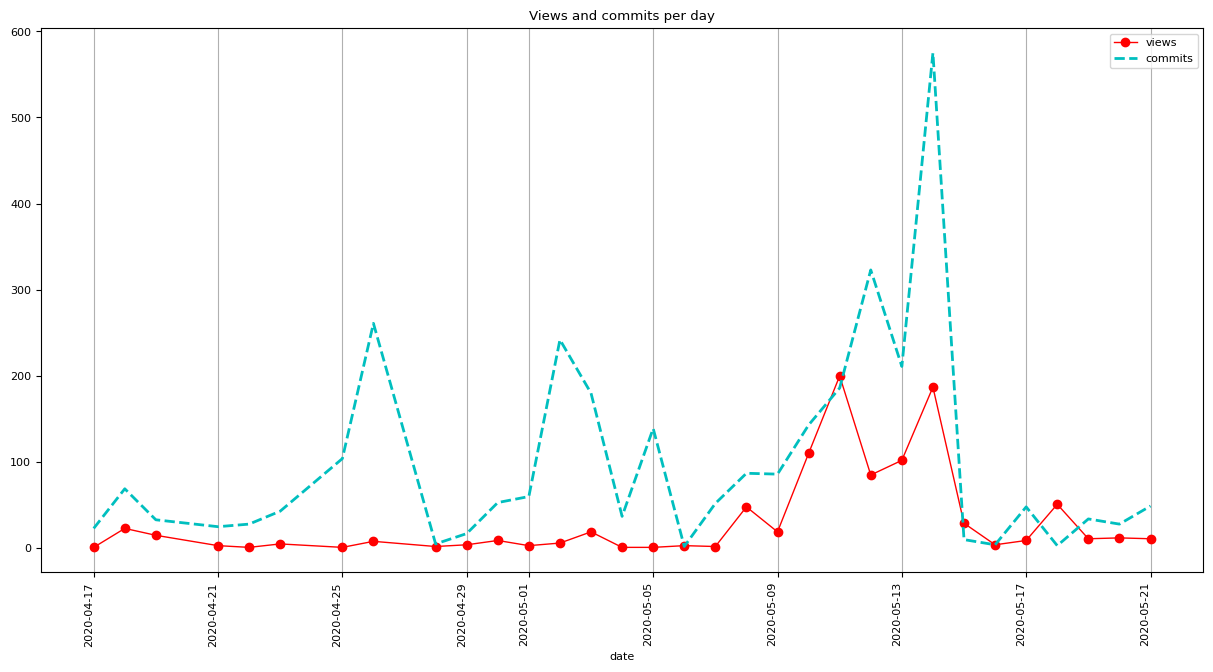

In [17]:
import pandas as pd
import sqlite3

con = sqlite3.connect(r"../data/checking-logs.sqlite")

views = pd.read_sql("""
SELECT date(datetime) AS date, COUNT(*) AS views
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY date
""", con, parse_dates=['date'])

commits = pd.read_sql("""
SELECT date(timestamp) AS date, COUNT(*) AS commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date
""", con, parse_dates=['date'])

merged = pd.merge(views, commits, on='date', how='inner').set_index('date')


ax = merged.plot(
    figsize=(15, 8),
    style=['o-r', '--c'],  # стили для каждого столбца
    title='Views and commits per day',
    rot=90,
    fontsize=8,
)
ax.grid(axis='x')

for line, width in zip(ax.get_lines(), [1, 2]):
    line.set_linewidth(width)

ax.legend()

con.close()

print(f"The dataframe for the graph contains, rows: {len(merged)}")
print("Times views > 150 =", (merged['views']>150).sum())


**How many times was the number of views larger than 150?**  
The answer is **2**.